In [1]:
def read_log_file(filename):
    train_acc1 = []
    train_acc5 = []
    train_sparsity = []
    test_acc1 = []
    test_acc5 = []
    test_acc1_epoch = []
    test_acc5_epoch = []
    with open(filename) as fin:
        for line in fin:
            line_array = line.strip().split("\t")
            if len(line_array) == 6: # train
                line_array2 = line_array[4].split()
                train_acc1.append(float(line_array2[1])/100)
                line_array2 = line_array[5].split()
                train_acc5.append(float(line_array2[1])/100)
            if len(line_array) == 1: # sparsity
                line_array_parse_again = line_array[0].split(" ")
                if len(line_array_parse_again) == 1:
                    continue
                if line_array[0][0] == "=":
                    continue
                elif line_array[0][0] == "[":
                    continue
                elif line_array[0][0] == "*":
                    if line_array[0][1] == "*":
                        continue
                    line_array2 = line_array[0].split()
                    test_acc1_epoch.append(float(line_array2[2])/100)
                    test_acc5_epoch.append(float(line_array2[4])/100)
                else:
                    line_array2 = line_array[0].split()
                    # train_sparsity.append(1 - float(line_array2[0]) / 25557032)
                    train_sparsity.append(float(line_array2[0]) / 25557032)
            if len(line_array) == 5: # test
                line_array2 = line_array[3].split()
                test_acc1.append(line_array2[1])
                line_array2 = line_array[4].split()
                test_acc5.append(line_array[1])
    return train_acc1, train_acc5, train_sparsity, test_acc1_epoch, test_acc5_epoch

In [2]:
train_acc1_all = []
train_acc5_all = []
train_sparsity_all = []
test_acc1_epoch_all = []
test_acc5_epoch_all = []
filenames_all = ["resnet50_sgd_lr0.1_noother.txt",
                 "resnet50_grda_lr0.1_c0.01_mu0.4.txt", 
                 "resnet50_grda_lr0.1_c0.005_mu0.501.txt", 
                 "resnet50_grda_lr0.1_c0.005_mu0.51.txt", 
                 "resnet50_grda_lr0.1_c0.005_mu0.55.txt"]

In [3]:
for filename in filenames_all:
    train_acc1, train_acc5, train_sparsity, test_acc1_epoch, test_acc5_epoch = read_log_file(filename)
    train_acc1_all.append(train_acc1)
    train_acc5_all.append(train_acc5)
    train_sparsity_all.append(train_sparsity)
    test_acc1_epoch_all.append(test_acc1_epoch)
    test_acc5_epoch_all.append(test_acc5_epoch)

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'
import pandas as pd

In [5]:
total_iteration = min(len(train_acc1_all[0]), len(train_acc1_all[1]), len(train_acc1_all[2]), len(train_acc1_all[3]), len(train_acc1_all[4]))
epoch_num = np.array(range(total_iteration))/501
df_train_acc1_all = pd.DataFrame({"epoch_num": epoch_num, "sgd": train_acc1_all[0][0:total_iteration], 
                                  "c0.01_mu0.4": train_acc1_all[1][0:total_iteration], 
                                  "c0.005_mu0.501": train_acc1_all[2][0:total_iteration], 
                                  "c0.005_mu0.51": train_acc1_all[3][0:total_iteration], 
                                  "c0.005_mu0.55": train_acc1_all[4][0:total_iteration]})
df_train_acc5_all = pd.DataFrame({"epoch_num": epoch_num, "sgd": train_acc5_all[0][0:total_iteration], 
                                  "c0.01_mu0.4": train_acc5_all[1][0:total_iteration], 
                                  "c0.005_mu0.501": train_acc5_all[2][0:total_iteration], 
                                  "c0.005_mu0.51": train_acc5_all[3][0:total_iteration], 
                                  "c0.005_mu0.55": train_acc5_all[4][0:total_iteration]})
epoch_num_int = int(total_iteration/501)
epoch_num_int_arr = range(1, epoch_num_int+1)
print(epoch_num_int)
df_test_acc1_all = pd.DataFrame({"epoch_num": epoch_num_int_arr, "sgd": test_acc1_epoch_all[0][0:epoch_num_int],
                                 "c0.01_mu0.4": test_acc1_epoch_all[1][0:epoch_num_int], 
                                 "c0.005_mu0.501": test_acc1_epoch_all[2][0:epoch_num_int], 
                                 "c0.005_mu0.51": test_acc1_epoch_all[3][0:epoch_num_int], 
                                 "c0.005_mu0.55": test_acc1_epoch_all[4][0:epoch_num_int]})
df_test_acc5_all = pd.DataFrame({"epoch_num": epoch_num_int_arr, "sgd": test_acc5_epoch_all[0][0:epoch_num_int],
                                 "c0.01_mu0.4": test_acc5_epoch_all[1][0:epoch_num_int], 
                                 "c0.005_mu0.501": test_acc5_epoch_all[2][0:epoch_num_int], 
                                 "c0.005_mu0.51": test_acc5_epoch_all[3][0:epoch_num_int], 
                                 "c0.005_mu0.55": test_acc5_epoch_all[4][0:epoch_num_int]})

147


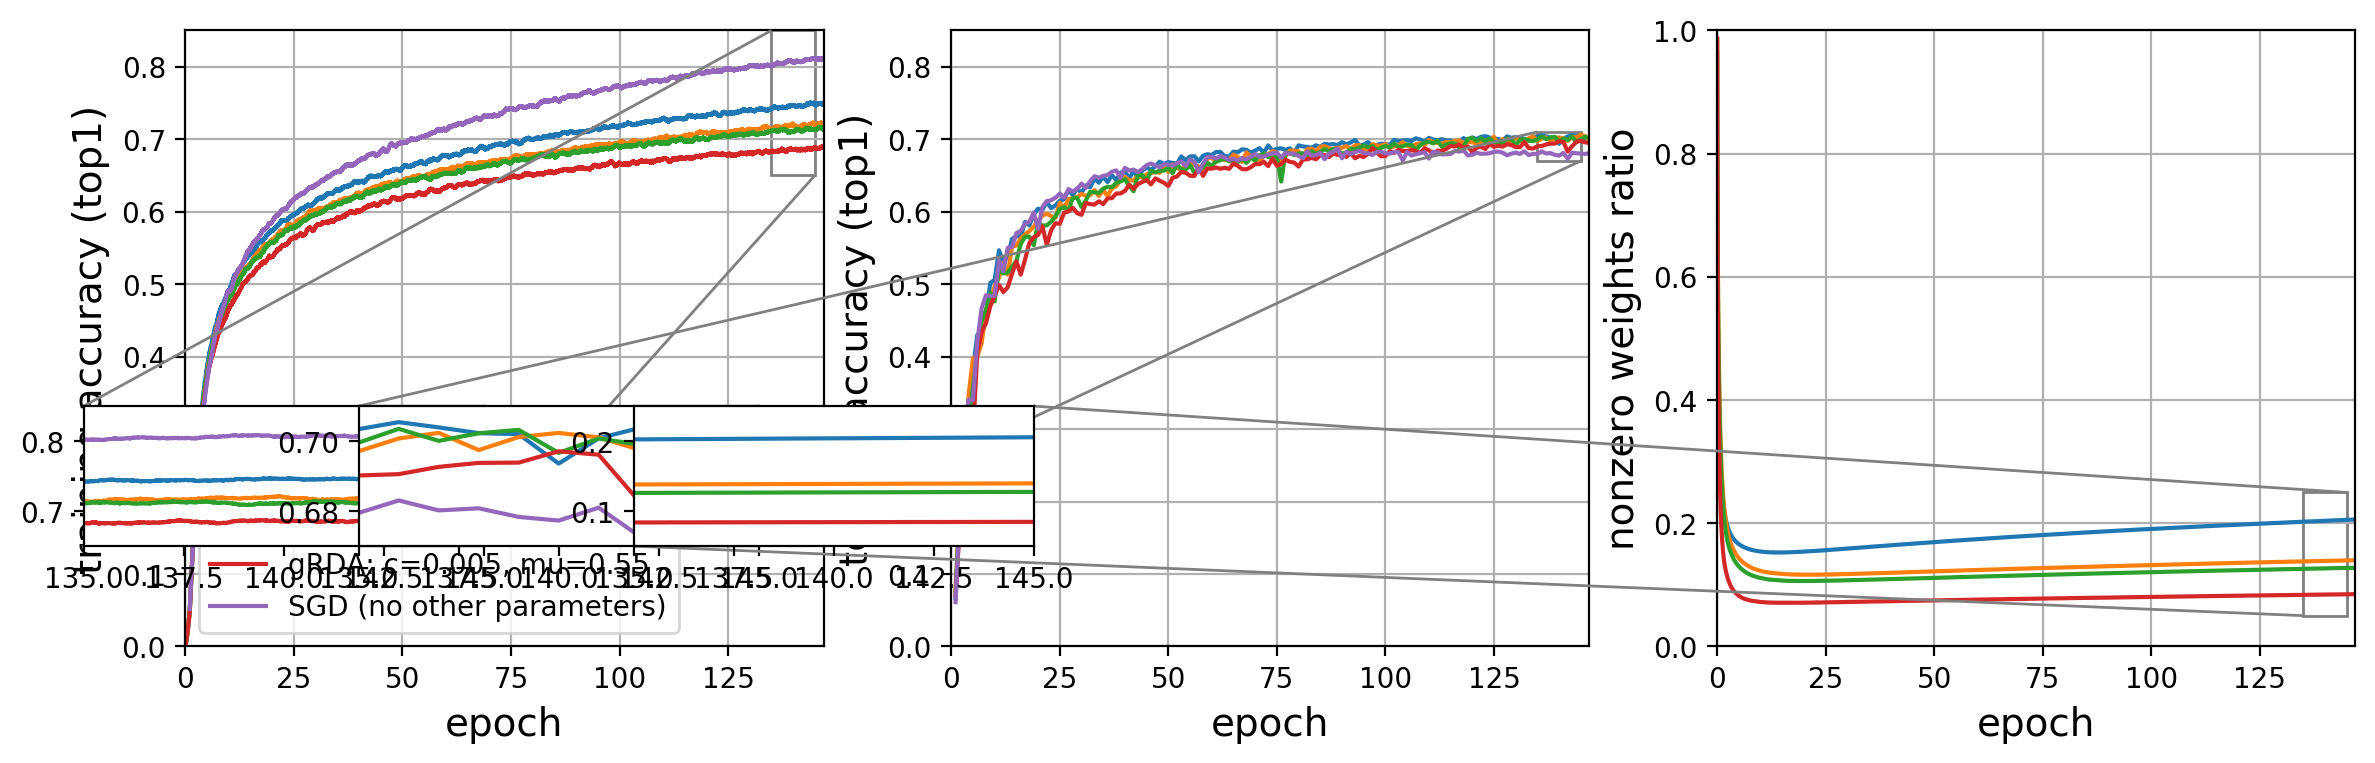

In [11]:
plt.style.use('default')
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset


fig, axs = plt.subplots(1, 3)
fig.set_figheight(4)
fig.set_figwidth(14)

axs_index = 0
axs_sub = axs[axs_index]
window_size = 500
l2, = axs_sub.plot(epoch_num, df_train_acc1_all["c0.01_mu0.4"].rolling(window=window_size, min_periods=10).mean())
l4, = axs_sub.plot(epoch_num, df_train_acc1_all["c0.005_mu0.501"].rolling(window=window_size, min_periods=10).mean())
l5, = axs_sub.plot(epoch_num, df_train_acc1_all["c0.005_mu0.51"].rolling(window=window_size, min_periods=10).mean())
l6, = axs_sub.plot(epoch_num, df_train_acc1_all["c0.005_mu0.55"].rolling(window=window_size, min_periods=10).mean())
l8, = axs_sub.plot(epoch_num, df_train_acc1_all.sgd.rolling(window=window_size).mean())
axs_sub.set_xlim(0,  epoch_num_int_arr[-1])
axs_sub.set_ylim(0, 0.85)
axs_sub.set_xlabel('epoch', fontsize=14)
axs_sub.set_ylabel('training accuracy (top1)', fontsize=14)
axs_sub.grid(True)

zoom_subfig_height = 0.7
zoom_subfig_pos_height = 105

axins = inset_axes(axs_sub, width=2, height=zoom_subfig_height, loc="lower left", bbox_to_anchor=(165,zoom_subfig_pos_height), borderpad=3)
mark_inset(axs_sub, axins, loc1=2, loc2=4, fc="none", ec="0.5")
axins.set_xlim([135,145])
axins.set_ylim([0.65,0.85])

axs_sub = axins
l2, = axs_sub.plot(epoch_num, df_train_acc1_all["c0.01_mu0.4"].rolling(window=window_size, min_periods=10).mean())
l4, = axs_sub.plot(epoch_num, df_train_acc1_all["c0.005_mu0.501"].rolling(window=window_size, min_periods=10).mean())
l5, = axs_sub.plot(epoch_num, df_train_acc1_all["c0.005_mu0.51"].rolling(window=window_size, min_periods=10).mean())
l6, = axs_sub.plot(epoch_num, df_train_acc1_all["c0.005_mu0.55"].rolling(window=window_size, min_periods=10).mean())
l8, = axs_sub.plot(epoch_num, df_train_acc1_all.sgd.rolling(window=window_size).mean())
plt.xticks(visible=True)
plt.yticks(visible=True)


axs_index += 1
axs_sub = axs[axs_index]
axs_sub.plot(epoch_num_int_arr, df_test_acc1_all["c0.01_mu0.4"])
axs_sub.plot(epoch_num_int_arr, df_test_acc1_all["c0.005_mu0.501"])
axs_sub.plot(epoch_num_int_arr, df_test_acc1_all["c0.005_mu0.51"])
axs_sub.plot(epoch_num_int_arr, df_test_acc1_all["c0.005_mu0.55"])
axs_sub.plot(epoch_num_int_arr, df_test_acc1_all.sgd)
axs_sub.set_xlim(0, epoch_num_int_arr[-1])
axs_sub.set_ylim(0, 0.85)
axs_sub.set_xlabel('epoch', fontsize=14)
axs_sub.set_ylabel('testing accuracy (top1)', fontsize=14)
axs_sub.grid(True)


axins = inset_axes(axs_sub, width=2, height=zoom_subfig_height, loc="lower left", bbox_to_anchor=(440,zoom_subfig_pos_height), borderpad=3)
mark_inset(axs_sub, axins, loc1=2, loc2=4, fc="none", ec="0.5")
axins.set_xlim([135,145])
axins.set_ylim([0.67,0.71])

axs_sub = axins
axs_sub.plot(epoch_num_int_arr, df_test_acc1_all["c0.01_mu0.4"])
axs_sub.plot(epoch_num_int_arr, df_test_acc1_all["c0.005_mu0.501"])
axs_sub.plot(epoch_num_int_arr, df_test_acc1_all["c0.005_mu0.51"])
axs_sub.plot(epoch_num_int_arr, df_test_acc1_all["c0.005_mu0.55"])
axs_sub.plot(epoch_num_int_arr, df_test_acc1_all.sgd)
plt.xticks(visible=True)
plt.yticks(visible=True)





axs_index += 1
axs_sub = axs[axs_index]
axs_sub.plot(epoch_num, train_sparsity_all[1][0:total_iteration])
axs_sub.plot(epoch_num, train_sparsity_all[2][0:total_iteration])
axs_sub.plot(epoch_num, train_sparsity_all[3][0:total_iteration])
axs_sub.plot(epoch_num, train_sparsity_all[4][0:total_iteration])
axs_sub.set_xlim(0,  epoch_num_int_arr[-1])
axs_sub.set_ylim(0, 1)
axs_sub.set_xlabel('epoch', fontsize=14)
axs_sub.set_ylabel('nonzero weights ratio', fontsize=14)
axs_sub.grid(True)


axins = inset_axes(axs_sub, width=2, height=zoom_subfig_height, loc="lower left", bbox_to_anchor=(715,zoom_subfig_pos_height), borderpad=3)
mark_inset(axs_sub, axins, loc1=1, loc2=3, fc="none", ec="0.5")
axins.set_xlim([135,145])
axins.set_ylim([0.05,0.25])

axs_sub = axins
axs_sub.plot(epoch_num, train_sparsity_all[1][0:total_iteration])
axs_sub.plot(epoch_num, train_sparsity_all[2][0:total_iteration])
axs_sub.plot(epoch_num, train_sparsity_all[3][0:total_iteration])
axs_sub.plot(epoch_num, train_sparsity_all[4][0:total_iteration])
axs_sub.plot(epoch_num_int_arr, df_test_acc1_all.sgd)
plt.xticks(visible=True)
plt.yticks(visible=True)





axs[0].legend([l2, l4, l5, l6, l8],["gRDA: c=0.01, mu=0.4", "gRDA: c=0.005, mu=0.501", "gRDA: c=0.005, mu=0.51", "gRDA: c=0.005, mu=0.55", "SGD (no other parameters)"], loc='lower left')

plt.savefig("imagenet_training-largefont.pdf", bbox_inches='tight')
